## 用Scrapy 框架抓取某网站二手车信息，进行数据分析，分析二手车的市场情况

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [155]:
# 读取数据
dataset = pd.read_csv("../58_car/car_data.csv",encoding='gbk')
dataset.head(20)

,city,brand,title,start_time,distance,volumn,gear,tag,price
0,北京二手车,奔驰,S级 2018款 S级 S450L 4MATIC,2018年,4.4万公里,3.0升,自动,90天可退,101.00
1,北京二手车,丰田,兰德酷路泽 2018款 兰德酷路泽 GXR 八气囊后挂,2019年,0.4万公里,4.0升,自动,90天可退,76.50
2,北京二手车,路虎,揽胜 2017款 3.0 V6 SC Vogue SE 创世加长版,2018年,4万公里,3.0升,自动,90天可退,110.00
3,北京二手车,奥迪,Q7 2018款 40 TFSI S line运动型,2018年,1.26万公里,2.0升,自动,90天可退,53.38
4,北京二手车,北汽新能源,EC系列 2017款 EC180 灵秀版,2017年,0.7万公里,纯电动,自动,好评商家,2.58
5,北京二手车,宾利,慕尚 2015款 6.8T 自动 标准版,2015年,3万公里,6.8升,自动,高配,235.00
6,北京二手车,宝马,5系 2006款 530i,2006年,16万公里,3.0升,自动,高配,5.10
7,北京二手车,大众,帕萨特 2006款 1.8T 手动 标准版,2006年,13万公里,1.8升,手动,好评商家,1.00
8,北京二手车,北汽制造,BJ 212 2018款 212 2.0L 方门,2018年,0.29万公里,2.0升,手动,好评商家,6.00
9,北京二手车,路虎,揽胜 2004款 4.4 自动 顶级版,2006年,10万公里,4.4升,自动,高配,14.50


In [156]:
# 查看总体的情况
dataset.describe()

# 查看共计9823条数据，gerar这一列 为空值
# 总共二手车的平均价格是 12.25w  最低的是 0.3w  最高的是 318w

,price
count,9823.000000
mean,11.848434
std,17.025540
min,0.280000
25%,4.310000
50%,7.390000
75%,12.830000
max,348.000000


In [157]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
city          9827 non-null object
brand         9827 non-null object
title         9823 non-null object
start_time    9827 non-null object
distance      9825 non-null object
volumn        9827 non-null object
gear          9827 non-null object
tag           9827 non-null object
price         9823 non-null float64
dtypes: float64(1), object(8)
memory usage: 691.0+ KB


In [158]:
# 从上面的概况可以看出，数据存在着脏数据，有缺失值
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9817 entries, 0 to 9826
Data columns (total 9 columns):
city          9817 non-null object
brand         9817 non-null object
title         9817 non-null object
start_time    9817 non-null object
distance      9817 non-null object
volumn        9817 non-null object
gear          9817 non-null object
tag           9817 non-null object
price         9817 non-null float64
dtypes: float64(1), object(8)
memory usage: 767.0+ KB


In [159]:
# 将start_time 获取年限，转成 int 类型
str_year = dataset['start_time'].str
dataset['start_time'] = str_year[:4].astype(int)


In [160]:
dataset.describe()

,start_time,price
count,9817.000000,9817.000000
mean,2012.773250,11.839892
std,3.628917,17.008603
min,1995.000000,0.280000
25%,2010.000000,4.310000
50%,2013.000000,7.380000
75%,2016.000000,12.800000
max,2019.000000,348.000000


In [162]:
# 将distance 行驶的公里数，转成数值类型
dataset['distance'] = dataset['distance'].str[:-3].astype(float)


In [163]:
dataset.describe()

,start_time,distance,price
count,9817.000000,9817.000000,9817.000000
mean,2012.773250,7.561741,11.839892
std,3.628917,4.024319,17.008603
min,1995.000000,0.010000,0.280000
25%,2010.000000,4.900000,4.310000
50%,2013.000000,7.210000,7.380000
75%,2016.000000,10.000000,12.800000
max,2019.000000,36.000000,348.000000


### 描述性分析：

In [182]:
dataset.head()

,city,brand,title,start_time,distance,volumn,gear,tag,price
0,北京二手车,奔驰,S级 2018款 S级 S450L 4MATIC,2018,4.40,3.0升,自动,90天可退,101.00
1,北京二手车,丰田,兰德酷路泽 2018款 兰德酷路泽 GXR 八气囊后挂,2019,0.40,4.0升,自动,90天可退,76.50
2,北京二手车,路虎,揽胜 2017款 3.0 V6 SC Vogue SE 创世加长版,2018,4.00,3.0升,自动,90天可退,110.00
3,北京二手车,奥迪,Q7 2018款 40 TFSI S line运动型,2018,1.26,2.0升,自动,90天可退,53.38
4,北京二手车,北汽新能源,EC系列 2017款 EC180 灵秀版,2017,0.70,纯电动,自动,好评商家,2.58


In [183]:
# 根据地区进行分组统计
city_data = dataset['city'].value_counts()
city_data

# 查看结果可以发现 数据集是从深圳，上海，广州，北京，杭州 这几个城市的统计

深圳二手车    3411
上海二手车    3093
广州二手车    2255
北京二手车     770
杭州二手车     288
Name: city, dtype: int64

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


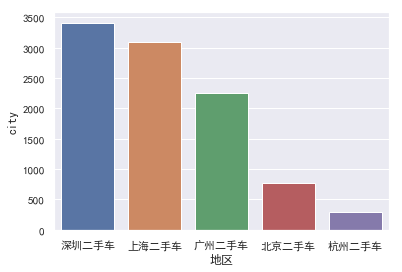

In [184]:
# 画图显示 数据中二手车的分布数量情况
sns.set(font='SimHei')  # 设置字体

fig = plt.figure()
sns.barplot(city_data.index,city_data)  # 绘制条形图
plt.xlabel("地区")
fig.show()
# 根据图可以看出深圳的二手车说最多，也侧面看出深圳的二手车市场比较好

In [185]:
# 按品牌分析各品牌的数量 top10

brand_count = dataset['brand'].value_counts()

# 排序, 按照从多到少的顺序排列
sort_barad = brand_count.sort_values(ascending=False)
# 二手车量top10
sort_barad.head(10)

别克     1081
大众      939
丰田      651
宝马      589
本田      522
奥迪      463
奔驰      454
日产      439
江铃      407
雪佛兰     394
Name: brand, dtype: int64

In [198]:
# 分析出品牌平均价格最高的十个品牌

num_price =dataset.groupby('brand')['price'].mean().sort_values(ascending=False)[:10]
num_price

brand
劳斯莱斯    274.666667
法拉利     184.570000
宾利      157.211111
巴博斯      82.800000
玛莎拉蒂     60.255000
保时捷      52.687661
特斯拉      50.462857
路虎       44.523145
悍马       42.800000
奔驰       32.899934
Name: price, dtype: float64

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


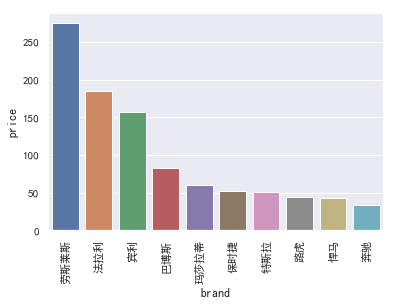

In [199]:
#  用条形图显示出来
sns.set(font='SimHei')
fig = plt.figure()
sns.barplot(num_price.index,num_top)
plt.xticks(rotation=90) # x标签显示90度
fig.show()

In [202]:
# 数量分析 数量最多的前10个品牌

num_top = dataset['brand'].value_counts().sort_values(ascending=False)[:10]
num_top

别克     1081
大众      939
丰田      651
宝马      589
本田      522
奥迪      463
奔驰      454
日产      439
江铃      407
雪佛兰     394
Name: brand, dtype: int64

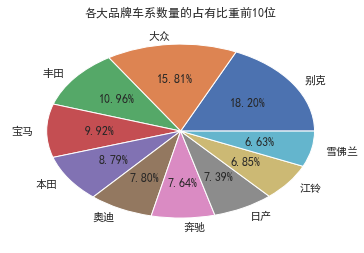

In [203]:
# 各大品牌的占比情况

plt.figure()
plt.pie(num_top,labels = num_top.index,autopct='%1.2f%%')
plt.title("各大品牌车系数量的占有比重前10位")
plt.show()

# 可以看出在二手市场中，别克品牌的数量最多，其次是大众，再次是丰田

In [206]:
# 分析二手市场是品牌 别克 车系价格的分布情况

df_bieke = dataset[dataset['brand']=='别克']
df_bieke.head()

,city,brand,title,start_time,distance,volumn,gear,tag,price
24,北京二手车,别克,C级 2017款 改款 C 200 L 运动版,2017,6.2,2.0升,自动,好评商家,16.50
25,北京二手车,别克,君越 2016款 28T 精英型,2015,6.2,1.6升,自动,好评商家,9.38
44,北京二手车,别克,GLC级 2017款 GLC 200 4MATIC,2014,4.0,1.5升,手动,高配,4.50
68,北京二手车,别克,GL8 2006款 陆尊 3.0L GT 精英版,2007,15.0,3.0升,自动,90天可退,2.25
78,北京二手车,别克,GL8 2006款 3.0L 自动 7座XT导航型,2006,16.0,3.0升,自动,营转非,1.80


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


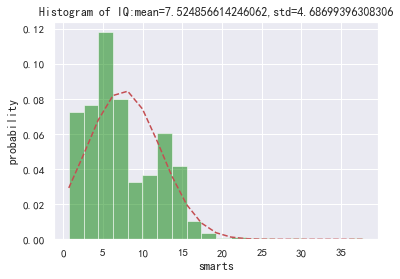

In [207]:
#  画出别克车系的价格高斯分布图

bieke_mean = df_bieke['price'].mean()
bieke_std = df_bieke['price'].std()
num_bins = 20 #条状图数量
n,bins,patches = plt.hist(df_bieke['price'],num_bins,normed=1,facecolor='green',alpha=0.5)
import matplotlib.mlab as mlab
y = mlab.normpdf(bins,bieke_mean,bieke_std)
plt.plot(bins,y,'r--')
plt.xlabel("smarts")
plt.ylabel("probability")
plt.title(r"Histogram of IQ:mean={},std={}".format(bieke_mean,bieke_std))
plt.subplots_adjust(left=0.15)
plt.show()

In [214]:
## 建模预测分析

# 让volumn  ，contains 字符串的一个方法，判断是否含有子字符串有则是True 没有返回 False
dataset=dataset[~dataset['volumn'].str.contains('电动')]


AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [213]:
dataset['volumn']=dataset['volumn'].apply(lambda x : float(x[:-1]))

dataset.head()

TypeError: 'float' object is not subscriptable

In [215]:
# 利用独热编码来处理离散的数值
one_hot_df = pd.get_dummies(dataset[['brand','gear']])

In [216]:
dataset = dataset.drop('brand',axis=1).drop('gear',axis=1)
dataset = pd.merge(dataset,one_hot_df,left_index=True,right_index=True)
dataset.head()

,city,title,start_time,distance,volumn,tag,price,brand_DS,brand_GMC,brand_MG,...,brand_陆风,brand_雪佛兰,brand_雪铁龙,brand_雷克萨斯,brand_雷诺,brand_领克,brand_风行,brand_马自达,gear_手动,gear_自动
0,北京二手车,S级 2018款 S级 S450L 4MATIC,2018,4.40,3.0,90天可退,101.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,北京二手车,兰德酷路泽 2018款 兰德酷路泽 GXR 八气囊后挂,2019,0.40,4.0,90天可退,76.50,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,北京二手车,揽胜 2017款 3.0 V6 SC Vogue SE 创世加长版,2018,4.00,3.0,90天可退,110.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,北京二手车,Q7 2018款 40 TFSI S line运动型,2018,1.26,2.0,90天可退,53.38,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,北京二手车,慕尚 2015款 6.8T 自动 标准版,2015,3.00,6.8,高配,235.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [221]:
dataset = dataset.drop('title',axis=1).drop('tag',axis=1)

KeyError: "['title'] not found in axis"

In [222]:
# 显示所有的列
dataset = dataset.drop('city',axis=1)
pd.set_option("display.max_columns",None)  # 取消最大列的限制
dataset.head()

,start_time,distance,volumn,price,brand_DS,brand_GMC,brand_MG,brand_MINI,brand_WEY,brand_一汽,brand_三菱,brand_上海汇众,brand_东南,brand_东风,brand_东风风光,brand_东风风神,brand_中华,brand_丰田,brand_九龙,brand_五菱,brand_众泰,brand_依维柯,brand_保时捷,brand_克莱斯勒,brand_凯迪拉克,brand_别克,brand_力帆,brand_劳斯莱斯,brand_北汽制造,brand_北汽幻速,brand_北汽绅宝,brand_华晨鑫源,brand_华泰,brand_双环,brand_双龙,brand_吉利,brand_吉奥,brand_吉普,brand_启辰,brand_哈弗,brand_大众,brand_大通,brand_天津一汽,brand_奇瑞,brand_奔腾,brand_奔驰,brand_奥迪,brand_威麟,brand_宝马,brand_宝骏,brand_宾利,brand_巴博斯,brand_广汽,brand_广汽讴歌,brand_开瑞,brand_悍马,brand_捷豹,brand_斯巴鲁,brand_斯柯达,brand_日产,brand_本田,brand_林肯,brand_标致,brand_欧宝,brand_比亚迪,brand_汉腾汽车,brand_江淮,brand_江铃,brand_沃尔沃,brand_法拉利,brand_海马,brand_玛莎拉蒂,brand_现代,brand_理念,brand_瑞麒,brand_福特,brand_福田,brand_福迪,brand_精灵smart,brand_红旗,brand_纳智捷,brand_英菲尼迪,brand_荣威,brand_菲亚特,brand_西亚特,brand_讴歌,brand_起亚,brand_路虎,brand_道奇,brand_野马,brand_金杯,brand_铃木,brand_长丰,brand_长城,brand_长安,brand_长安欧尚,brand_陆风,brand_雪佛兰,brand_雪铁龙,brand_雷克萨斯,brand_雷诺,brand_领克,brand_风行,brand_马自达,gear_手动,gear_自动
0,2018,4.40,3.0,101.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2019,0.40,4.0,76.50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2018,4.00,3.0,110.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2018,1.26,2.0,53.38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,2015,3.00,6.8,235.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [224]:
# 查看列的长度
len(dataset.columns)

106

## 建模分析
### 预测价格

In [225]:
# 数据准备
X = dataset[dataset.columns.difference(['price'])].values
Y = dataset['price'].values

In [227]:
#导包
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

D:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
D:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [228]:
#切分数据集,数据集分成训练集和测试集 测试集占30%
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=6)
#模型，用gbdt 算法来训练模型，即可以用于分类也可以用于回归。也可以筛选特征。
gbdt = GradientBoostingRegressor(n_estimators=100)
#训练模型
gbdt.fit(x_train,y_train)
pred = gbdt.predict(x_test)

In [229]:
# 查看一下训练结果
result_df = pd.DataFrame(np.concatenate((y_test.reshape(-1,1),pred.reshape(-1,1)),axis=1),columns=['y_pred','y_test'])
result_df.head()

,y_pred,y_test
0,20.98,20.921609
1,9.38,6.779024
2,3.80,6.414815
3,5.38,4.245338
4,3.57,4.114524


In [230]:
# 从上面的结果可以看出，预测值和真实值相差较小，模型误差还可以

In [231]:
# 模型进行评估
print("MSE",mean_squared_error(pred,y_test))   #平均平方误差
print("MAE",mean_absolute_error(pred,y_test))   #平均绝对误差
print("RASE",np.sqrt(mean_squared_error(pred,y_test)))   #均方根误差
print("R2",r2_score(pred,y_test))

MSE 44.37232817637208
MAE 2.9951471365098854
RASE 6.661255750710378
R2 0.7836550626866996
